<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Wine_Data_MiniBatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                         UCI Wine Quality Datasets

# Libraries

In [ ]:
#for Dl Modeling
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

#Number Crunching
import numpy as np
import scipy.stats as stats

#Dataset management
import pandas as pd

#data visulaization
import matplotlib.pyplot as plt
import seaborn as sns

#time
import time

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df=pd.read_csv(url,sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Visualization and cleaning

In [ ]:
#Data summery
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
#No of Unique values in each columns in the datasets
for i in (df.columns):
   print (f'{i} has {df[i].nunique()} unique values' )


fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


In [ ]:
#sns.pairplot(df,hue='quality')

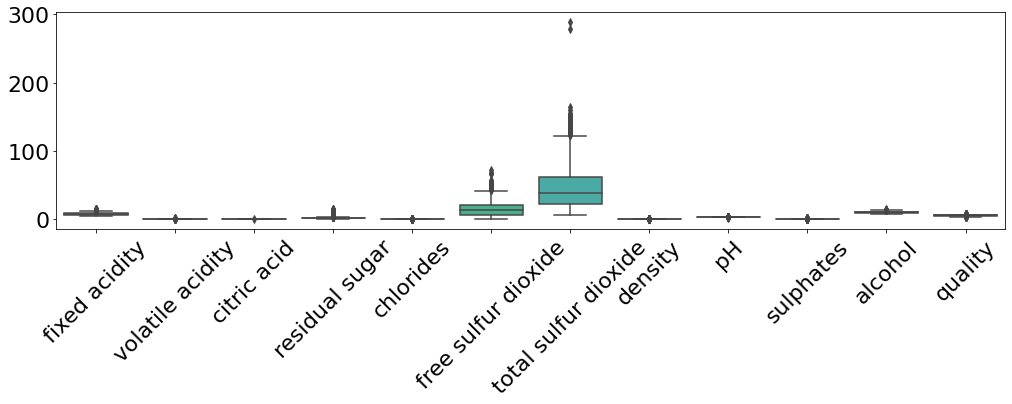

In [ ]:
ax,fig=plt.subplots(1,figsize=(17,4))
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show();


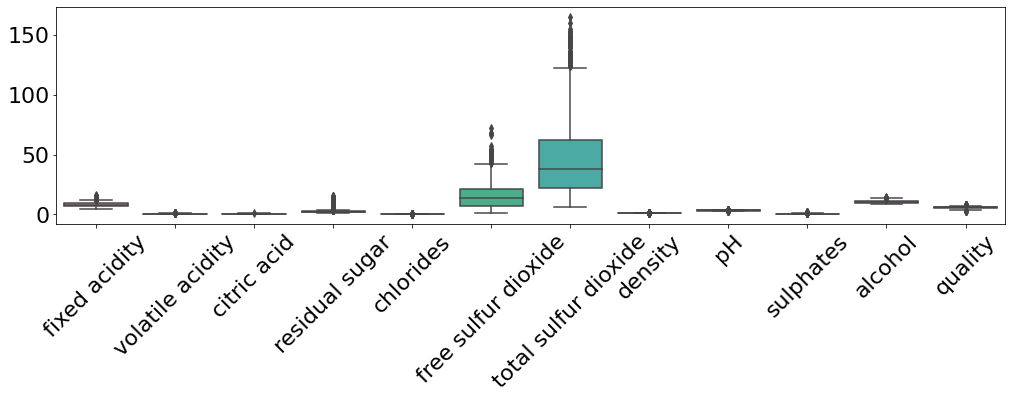

In [ ]:
#lets remove the outlier and examine the data again
df=df[~(df['total sulfur dioxide']>200)]
ax,fig=plt.subplots(1,figsize=(17,4))
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show();

In [ ]:
#Still the data Ranges for various featues are not in a symmetrical range...elts normalize the data

#Zscore all variables except quality
# df1=df.copy()
# colszscores=df.columns.drop('quality')
# for col in colszscores:
#   meanval=df[col].mean()
#   stdval=np.std(df[col],ddof=1)
#   df1[col]=(df[col]-meanval)/stdval

# df1.head()
# df1.describe().T

# We can do above code more comtact way

df1=df.copy()
colszscores=df1.columns.drop('quality')
df1[colszscores]=df1[colszscores].apply(stats.zscore)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1597.0,3.559388e-17,1.000313,-2.136087,-0.700608,-0.241254,0.505195,4.352281
volatile acidity,1597.0,1.245786e-16,1.000313,-2.280762,-0.771826,-0.045301,0.625338,5.878672
citric acid,1597.0,1.779694e-17,1.000313,-1.391823,-0.928677,-0.053845,0.769526,3.754246
residual sugar,1597.0,-9.788316e-17,1.000313,-1.169149,-0.452579,-0.237608,0.049020,9.292776
chlorides,1597.0,-1.423755e-16,1.000313,-1.604575,-0.372141,-0.180901,0.052836,11.123495
free sulfur dioxide,1597.0,8.898469e-18,1.000313,-1.422837,-0.847870,-0.177075,0.493721,5.380944
total sulfur dioxide,1597.0,-5.339081e-17,1.000313,-1.262581,-0.759698,-0.256814,0.497510,3.734821
density,1597.0,-8.361001e-14,1.000313,-3.546932,-0.611139,-0.000622,0.578043,3.683719
pH,1597.0,3.025479e-16,1.000313,-3.709380,-0.658744,-0.009673,0.574491,4.533826
sulphates,1597.0,8.898469e-17,1.000313,-1.937318,-0.639221,-0.226190,0.422859,7.916418


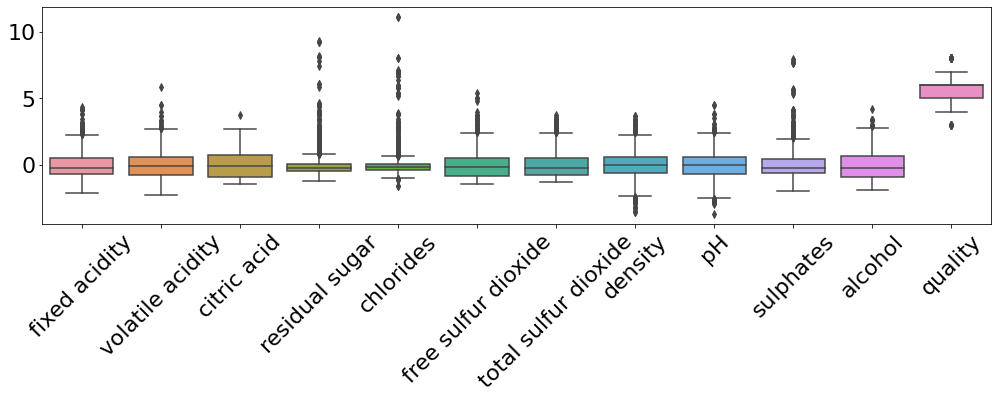

In [ ]:
#Exmanie the data Range
ax,fig=plt.subplots(1,figsize=(17,4))
ax=sns.boxplot(data=df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show();

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


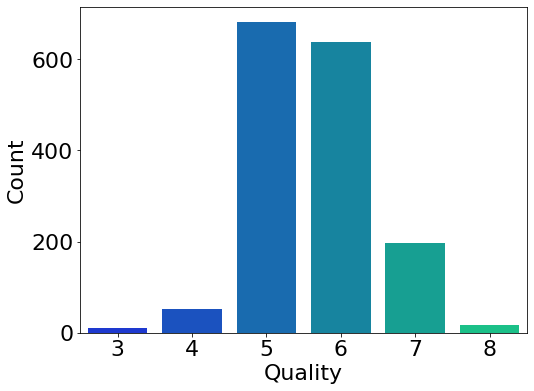

In [ ]:
# Lets examine distribution of target columns...to examine whether target is well distributed
# if target is not well distributed ...then ther might be issue in result
fig=plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size':22}) #increase the font size in figure

sns.countplot(df1.quality,palette='winter')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show();

<ipython-input-95-fd92a4a7fe20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['boolquality'][df1['quality']>5 ]=1


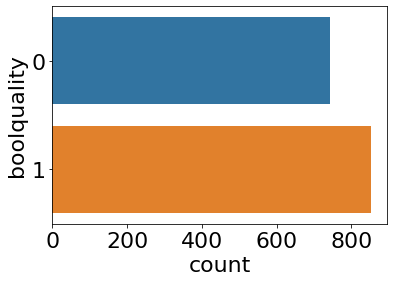

In [ ]:
#lets create a new column to have 'quality' in two Boolean values as the 'quality' distribution is not uniform..
df1['boolquality']=0
df1['boolquality'][df1['quality']>5 ]=1
df1[['quality','boolquality']].head()

sns.countplot(y=df1.boolquality);



# Reorganize and Split the data in Train and test set


In [ ]:
data=torch.tensor(df1[colszscores].values).float()
labels=torch.tensor(df1['boolquality'].values).float()
print(data.shape)
print(labels.shape)
#Translate the labels as a tensor
labels=labels[:,None]
print(labels.shape)


torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [ ]:
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.1)

#Convert these dat into Pytorch tensor Datasets
train_data=TensorDataset(train_data,train_label)
test_data=TensorDataset(test_data,test_label)

# print(train_data.tensors[0].shape)
# print(train_data.tensors[1].shape)
# print(test_data.tensors[0].shape)
# print(test_data.tensors[1].shape)


# Deep Learning section

In [ ]:
#Create a Model

def CreateModel():

  #Model Architecture
  ANNclass=nn.Sequential(
      nn.Linear(11,16),      
      nn.ReLU(),
      nn.Linear(16,32),
      nn.ReLU(),
      nn.Linear(32,32),
      nn.ReLU(),
      nn.Linear(32,1)
      
  )

  #Loss Function
  lossfunc=nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer=torch.optim.SGD(ANNclass.parameters(),lr=.01)

  return ANNclass,lossfunc,optimizer


In [ ]:
#Train the Model

#No of Epochs
numepochs=1000

#Train Model
def trainModel():

  #initialize Losses & Accuracy
  losses=torch.zeros(numepochs)
  trainacc=[]
  testacc=[]

  #Loop for each epochs

  for epochsi in range(numepochs):

    #Switch on Training
    ANNclass.train()

    #Initialize Batch loss and Batch accuracy
    batchacc=[]
    batchloss=[]

    #Lets start batch training--
    for X,y in train_loader:
      
      #Forward Pass & Loss calculation for the batch step 
      yHat=ANNclass(X)

      #Loss
      loss=lossfunc(yHat,y)

      #backpropop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      
      #Batch loss & Accuracy in each batch
      batchloss.append(loss.item())
      batchacc.append(100*torch.mean(((yHat>0)==y).float()).item())
      #print(batchloss)
      #print(batchloss.float())
      #print(batchloss.item())

      #End of Batch Loop

    # Accuracy and losses after each poch to be stored
    trainacc.append(np.mean(batchacc))
    losses[epochsi]=(np.mean(batchloss))

    #Start evaluation
    ANNclass.eval()#Stopping Training
    #Extract X & y from test Loader...remember test bacth have only one batch
    X,y=next(iter(test_loader))
    with torch.no_grad():
      yHat=ANNclass(X)
      testacc.append(100*torch.mean(((yHat>0)==y).float()).item())


  return trainacc,testacc,losses
      




# Experiment ....

In [ ]:
# batch sizes
batchsizes=2**np.arange(1,10,2)
#batchsizes

#initialize the outputresults
trainresults=np.zeros((numepochs,len(batchsizes)))
testresults=np.zeros((numepochs,len(batchsizes)))
cmptime=np.zeros(len(batchsizes))

#test Loader
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

#Train Loader for each Batch sizes
for bi in range(len(batchsizes)):

  #start the cock
  startTime=time.process_time()

  #Training Loader creation 
  train_loader=DataLoader(train_data,batch_size=int(batchsizes[bi]),shuffle=True,drop_last=True)

  #Create train Model
  ANNclass,lossfunc,optimizer=CreateModel()
  #Train Model
  
  trainacc,testacc,losses=trainModel()


  #Store data
  trainresults[:,bi]=trainacc
  testresults[:,bi]=testacc

  #complete time calc
  cmptime[bi]=time.process_time()-startTime




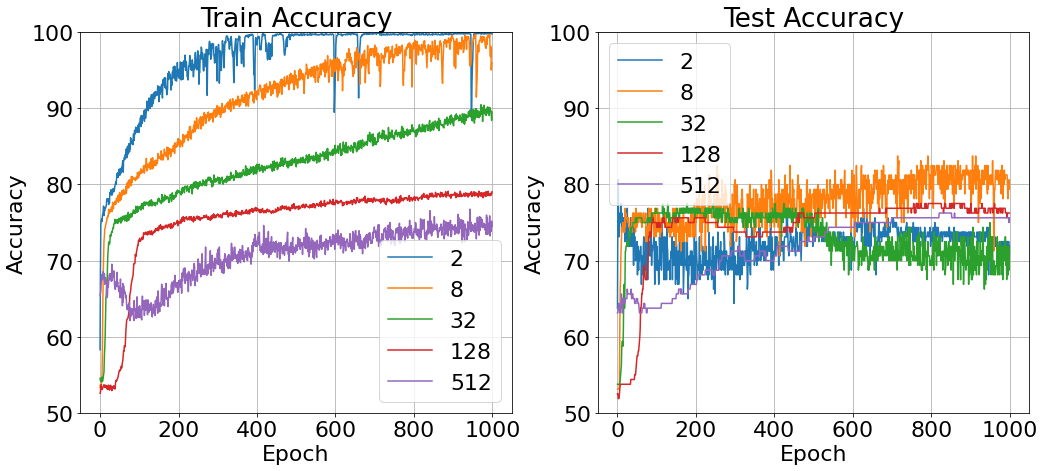

In [ ]:

fig,ax=plt.subplots(1,2,figsize=(17,7))

ax[0].plot(trainresults)
ax[0].set_title('Train Accuracy')
ax[1].plot(testresults)
ax[1].set_title('Test Accuracy')

#common Features
for i in range(2):
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy')
  ax[i].legend(batchsizes)
  ax[i].set_ylim([50,100])
  ax[i].grid()


plt.show()


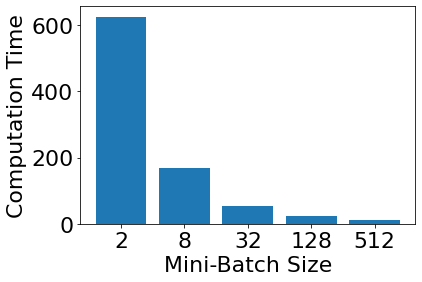

In [ ]:
#Bar Plot of computation time
plt.bar(range(len(cmptime)),cmptime,tick_label=batchsizes)
plt.xlabel('Mini-Batch Size')
plt.ylabel('Computation Time')
plt.show()